In this file, the goal is to plot the histogram of Reconstruction errors and the UMAP for the Left CINGULATE of subjects in HCP, CCD and CCD Controls after implementing a betaVAE, with HCP as training set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
import seaborn as sns
from statannotations.Annotator import Annotator

/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Load files

Embeddings_HCP= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-16/15-17-52/Embeddings.csv")
Embeddings_CCD= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-16/15-17-52/CCD/Embeddings.csv")

Reconstruc_error_HCP = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-16/15-17-52/Reconstruction_error.csv")
Reconstruc_error_CCD = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-16/15-17-52/CCD/Reconstruction_error.csv")

In [3]:
Participants_CCD=pd.read_csv("/neurospin/dico/data/human/CCD/participants.tsv", sep="\t")

In [4]:
Participants_CCD

,Index,Diagnosis
0,ag080048,control
1,bt080019,control
2,cd100556,control
3,fb070174,control
4,md110095,control
5,mm080047,control
6,vp100400,control
7,ca090293,CCD
8,cr070055,CCD
9,gd070065,CCD


In [5]:
CCD_Controls= Participants_CCD[Participants_CCD["Diagnosis"]=="control"]
CCD_Subjects= Participants_CCD[Participants_CCD["Diagnosis"]=="CCD"]

In [6]:
CCD_Subjects

,Index,Diagnosis
7,ca090293,CCD
8,cr070055,CCD
9,gd070065,CCD
10,lc110401,CCD
11,np090301,CCD
12,pa080037,CCD
13,pz080261,CCD


In [7]:
Embeddings_CCD

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,74
0,ag080048,0.769667,-0.966769,-0.499011,-0.180542,-0.867568,2.392175,-1.036226,-0.691212,0.245147,...,-0.994003,0.376446,0.201711,-1.914209,0.344873,0.843746,-0.119433,0.787176,-0.477065,0.258952
1,bt080019,0.045601,-1.050588,-1.536349,0.066136,0.904428,0.005017,-0.935201,-1.070642,0.300788,...,-1.298473,1.042745,0.133668,0.226648,1.001682,-0.594991,0.332650,-0.203370,-0.328684,0.585614
2,ca090293,-0.483104,1.396035,-0.143419,0.930716,-0.821519,-1.038485,-1.158976,-1.108720,0.391348,...,-0.583244,0.662622,0.919660,-1.135201,-0.091370,-0.870743,-0.464944,0.775541,1.173888,0.540909
3,cd100556,0.720090,0.444372,1.369562,0.248927,-1.984249,-0.714009,-0.049170,0.075838,0.511202,...,-0.379333,-0.333054,-0.180574,0.258435,-0.763621,-2.244917,0.302113,0.618105,-0.937495,-0.114818
4,cr070055,0.860044,0.375817,-0.898488,0.186864,-0.709263,-0.241806,0.878175,-0.976852,0.518388,...,0.556325,0.223337,1.003210,0.121543,0.026540,-0.877695,-0.358383,0.739604,-0.380022,-0.186381
5,fb070174,0.294690,-0.415242,0.117925,-1.114067,-0.330664,-2.713220,0.509233,-0.513671,0.308429,...,-0.491866,1.917016,1.604822,-0.049212,0.700133,-1.191944,-0.395055,-0.366133,-0.128095,0.218217
6,gd070065,-0.326812,-0.295287,-0.048643,-1.224948,0.021681,-1.113939,0.164242,-0.533877,0.798457,...,0.042322,1.204873,0.083961,-0.455747,-0.464756,-1.183064,0.281530,0.975445,-0.773341,0.372195
7,lc110410,0.340044,0.837889,-1.375576,-1.061255,-0.072859,0.036414,0.815406,-1.312329,-0.148155,...,-0.241402,-0.319855,0.953737,0.634616,-0.456803,-0.529044,0.753719,0.125826,-0.326133,0.039155
8,md110095,-0.135129,1.722657,-1.034234,-0.847687,-1.175090,0.584605,-0.546778,-0.606715,0.569170,...,-1.066868,-0.512903,-1.995360,-0.175423,-0.676848,2.974963,1.434430,-0.227764,0.401336,-0.465961
9,mm080047,1.122293,-0.223566,-1.046876,-0.210423,-0.769162,-0.435310,1.425738,0.271705,-0.932567,...,0.111770,0.028119,0.790417,0.419628,0.197155,-0.638900,0.164814,1.337193,-1.476869,-1.165247


In [8]:
Reconstruc_error_CCD 

,Unnamed: 0,0
0,ag080048,1555.108398
1,bt080019,2223.725830
2,ca090293,2792.436523
3,cd100556,1822.253296
4,cr070055,2683.924805
5,fb070174,2631.963379
6,gd070065,3218.552490
7,lc110410,3171.332031
8,md110095,2530.608398
9,mm080047,2146.406738


In [9]:
#We rename the first colomn 

Reconstruc_error_CCD  = Reconstruc_error_CCD.rename(columns={Reconstruc_error_CCD.columns[0]: "Index"})
Embeddings_CCD  = Embeddings_CCD.rename(columns={Embeddings_CCD.columns[0]: "Index"})

In [10]:
#From CCD, we separate CCD_Subjects and CCD_Controls

Reconstruc_error_CCD_Subjects = Reconstruc_error_CCD.merge(CCD_Subjects[["Index"]], on="Index", how="inner")
Reconstruc_error_CCD_Controls = Reconstruc_error_CCD.merge(CCD_Controls[["Index"]], on="Index", how="inner")

Embeddings_CCD_Subjects = Embeddings_CCD.merge(CCD_Subjects[["Index"]], on="Index", how="inner")
Embeddings_CCD_Controls = Embeddings_CCD.merge(CCD_Controls[["Index"]], on="Index", how="inner")

$\textbf{ Histogram of Reconstruction Errors}$

In [11]:
Reconstruc_error_HCP=Reconstruc_error_HCP.iloc[:,1]
Reconstruc_error_CCD_Subjects=Reconstruc_error_CCD_Subjects.iloc[:,1]
Reconstruc_error_CCD_Controls=Reconstruc_error_CCD_Controls.iloc[:,1]

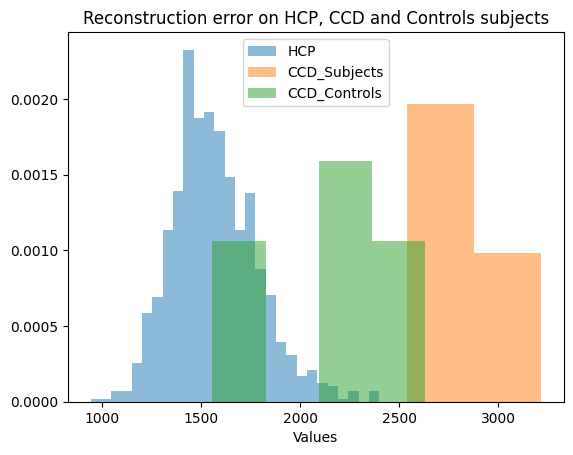

In [12]:
plt.hist(Reconstruc_error_HCP, bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(Reconstruc_error_CCD_Subjects, bins="auto", alpha=0.5, label="CCD_Subjects", density=True)
plt.hist(Reconstruc_error_CCD_Controls, bins="auto", alpha=0.5, label="CCD_Controls", density=True)

plt.xlabel("Values")

plt.title("Reconstruction error on HCP, CCD and Controls subjects")
plt.legend()
plt.show()

$\textbf{UMAP}$

In [13]:
X1 = Embeddings_HCP.iloc[:,1:76] #We remove de first column because it represents the id
                                 #1:76 because there are 75 components
X2= Embeddings_CCD_Controls.iloc[:,1:76]
X3= Embeddings_CCD_Subjects.iloc[:,1:76]


In [14]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X1)
X1_umap = reducer.transform(X1)
X2_umap = reducer.transform(X2)
X3_umap= reducer.transform(X3)

/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


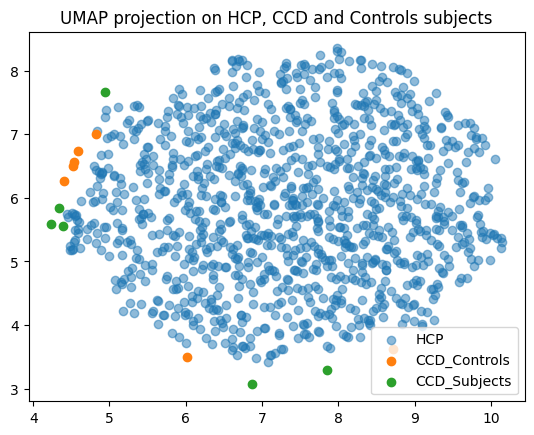

In [15]:
plt.scatter(X1_umap[:,0], X1_umap[:,1], label="HCP", alpha=0.5)
plt.scatter(X2_umap[:,0], X2_umap[:,1], label="CCD_Controls")
plt.scatter(X3_umap[:,0], X3_umap[:,1], label="CCD_Subjects")

plt.title("UMAP projection on HCP, CCD and Controls subjects")
plt.legend()
plt.show()

Boxplots of reconstruction errors

In [16]:
Reconstruc_error_HCP= pd.DataFrame({
    'database': 'HCP',
    'Reconstruc_error': Reconstruc_error_HCP
})

Reconstruc_error_CCD_Controls=pd.DataFrame({
    'database': 'CCD_Controls',
    'Reconstruc_error': Reconstruc_error_CCD_Controls
})

Reconstruc_error_CCD_Subjects=pd.DataFrame({
    'database': 'CCD_Subjects',
    'Reconstruc_error': Reconstruc_error_CCD_Subjects
})


In [17]:
Reconstruct_error= pd.concat([Reconstruc_error_HCP,Reconstruc_error_CCD_Controls,Reconstruc_error_CCD_Subjects ], ignore_index=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HCP vs. CCD_Controls: Mann-Whitney-Wilcoxon test two-sided, P_val:1.644e-05 U_stat=6.950e+02
CCD_Controls vs. CCD_Subjects: Mann-Whitney-Wilcoxon test two-sided, P_val:2.331e-03 U_stat=1.000e+00
HCP vs. CCD_Subjects: Mann-Whitney-Wilcoxon test two-sided, P_val:7.394e-16 U_stat=0.000e+00


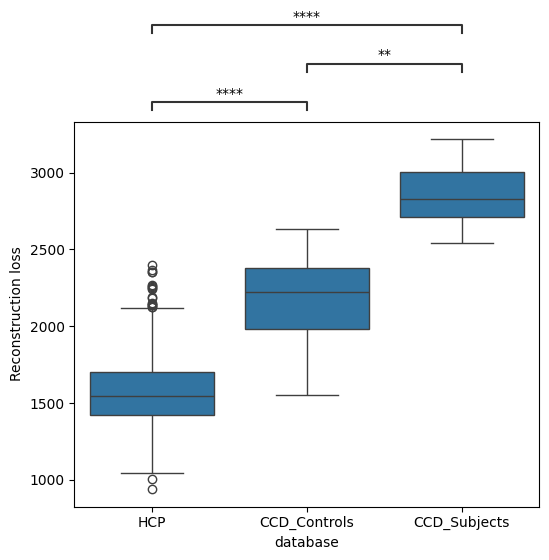

In [18]:

plt.figure(figsize=(6,5))
ax=sns.boxplot(x="database", y="Reconstruc_error", data=Reconstruct_error)

pairs = [("HCP", "CCD_Controls"), ("HCP", "CCD_Subjects"), ("CCD_Controls", "CCD_Subjects")]

annotator = Annotator(ax, pairs, data=Reconstruct_error, x="database", y="Reconstruc_error")
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside")
annotator.apply_test().annotate()

plt.ylabel("Reconstruction loss")
plt.show()
